In [2]:
import matplotlib.pyplot as plt
import pandas as pd


llms = [ 
    "gemma3n",  
    "qwen2.5",  
    "llama3.1",  
    "orca2",  
]


examples = {
    "FIC" : "join_examples_dict_1", 
    "CIC" : 'join_examples_dict_2',
    "FSC" : 'vector_based_examples_dict_1',
    "CSC" : 'vector_based_examples_dict_2',
}

model_types = ['TF', 'FT', 'UN', 'IN']


def extract_model_type(model): 
    flag = True
    for ll in llms:
        if ll in model:
            flag = False
    if flag: 
        return "P1"
    elif ' U ' in model: 
        return "UN"
    elif ' ∩ ' in model: 
        return "IN"
    elif '-tf-p2' in model: 
        return "TF"
    elif '-ft-p2' in model: 
        return "FT"
    elif '-z-p2' in model: 
        return "ZS" 
    else: 
        return "P1"


def df_plot_show(groups): 
    prompt_types = list(groups.keys())
    average_f1 = list(groups.values())


    df = pd.DataFrame({"Prompt Types" : prompt_types, "Average F1" : average_f1})

    display(df.style.hide())

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(prompt_types, average_f1, color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1.2)

    # Customize the plot
    plt.title('F1 Score Averages by Prompt Type', fontsize=16, fontweight='bold')
    plt.xlabel('Prompt Types', fontsize=12)
    plt.ylabel('Average F1 Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()



Prompt Types,Average F1
ZS,0.760952
FIC-TF,0.680253
CIC-TF,0.606098
FSC-TF,0.699019
CSC-TF,0.657048
FIC-FT,0.724407
CIC-FT,0.658386
FSC-FT,0.706932
CSC-FT,0.689788
FIC-UN,0.517453


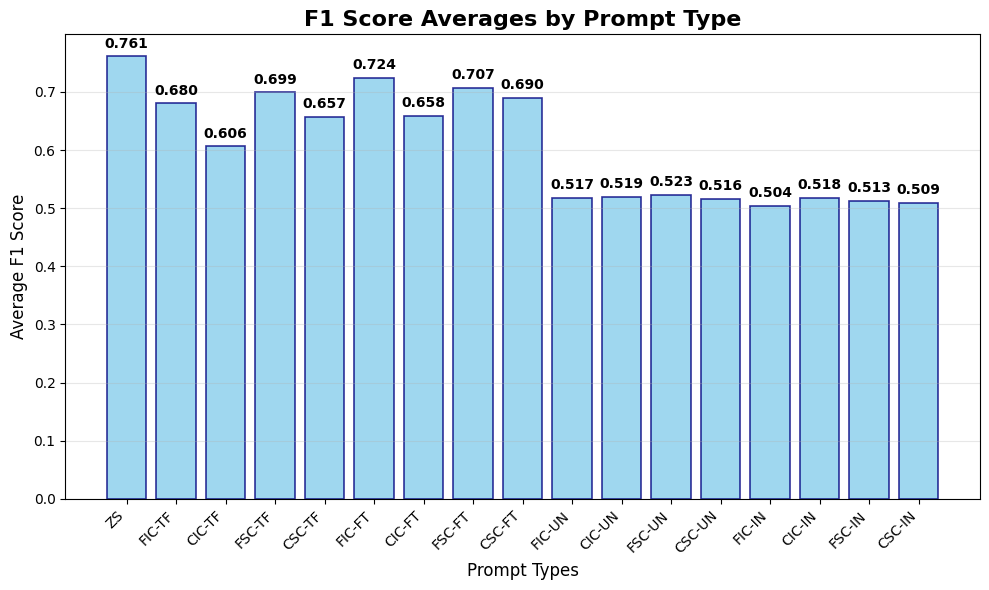

In [3]:

dataset = 'D2'
candidate_pairs = 'original'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)

    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)


results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)


results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])



groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)


Prompt Types,Average F1
ZS,0.757851
FIC-TF,0.721616
CIC-TF,0.755156
FSC-TF,0.750477
CSC-TF,0.781682
FIC-FT,0.713750
CIC-FT,0.731343
FSC-FT,0.730711
CSC-FT,0.772275
FIC-UN,0.247589


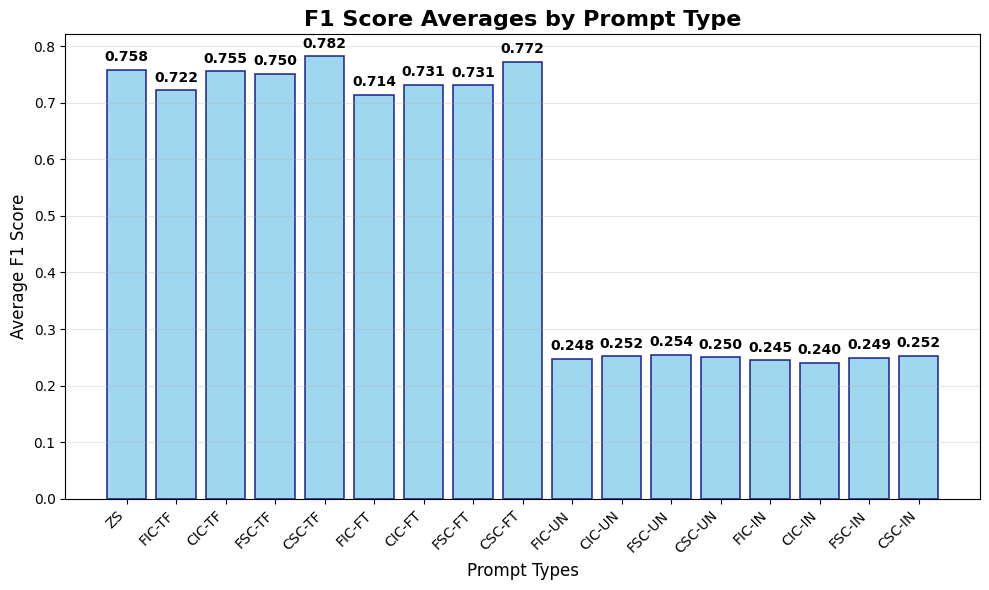

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = 'D5'
candidate_pairs = 'original'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)

results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 

results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

df_plot_show(groups)

Prompt Types,Average F1
ZS,0.558275
FIC-TF,0.554395
CIC-TF,0.551052
FSC-TF,0.516061
CSC-TF,0.544918
FIC-FT,0.565320
CIC-FT,0.575077
FSC-FT,0.560893
CSC-FT,0.551445
FIC-UN,0.010221


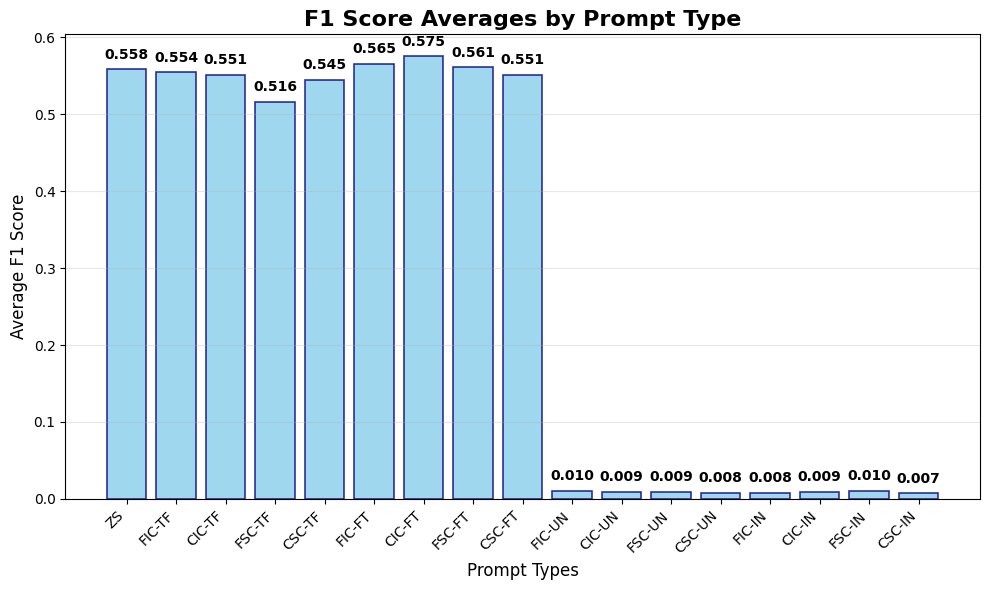

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = 'D6'
candidate_pairs = 'original'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)

    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)

results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.540394
FIC-TF,0.543850
CIC-TF,0.528622
FSC-TF,0.558173
CSC-TF,0.529927
FIC-FT,0.553851
CIC-FT,0.564443
FSC-FT,0.568606
CSC-FT,0.543133
FIC-UN,0.003132


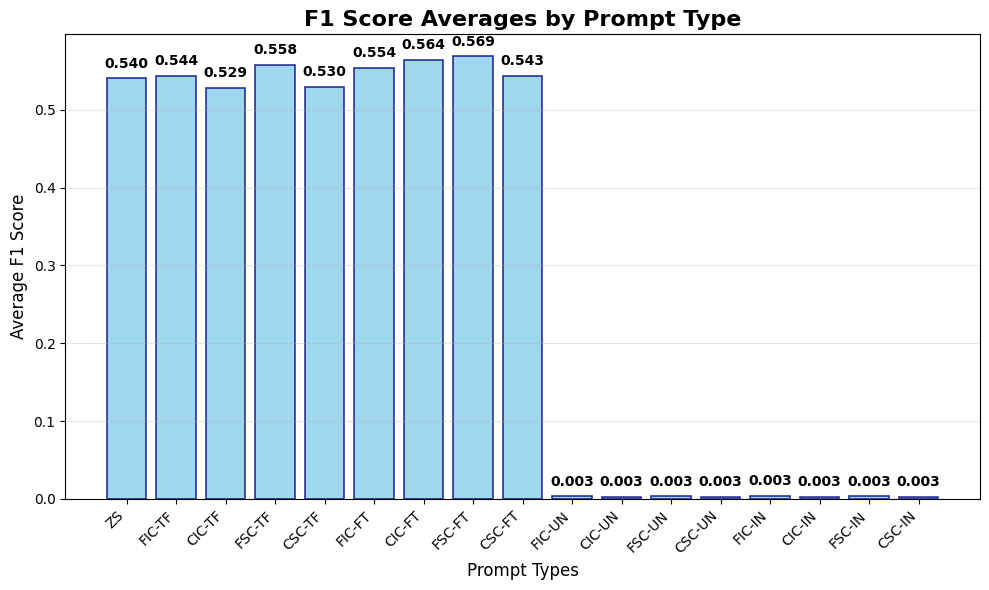

In [7]:
dataset = 'D7'
candidate_pairs = 'original'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.382639
FIC-TF,0.390244
CIC-TF,0.385474
FSC-TF,0.399708
CSC-TF,0.351518
FIC-FT,0.405144
CIC-FT,0.400753
FSC-FT,0.403449
CSC-FT,0.382374
FIC-UN,0.203939


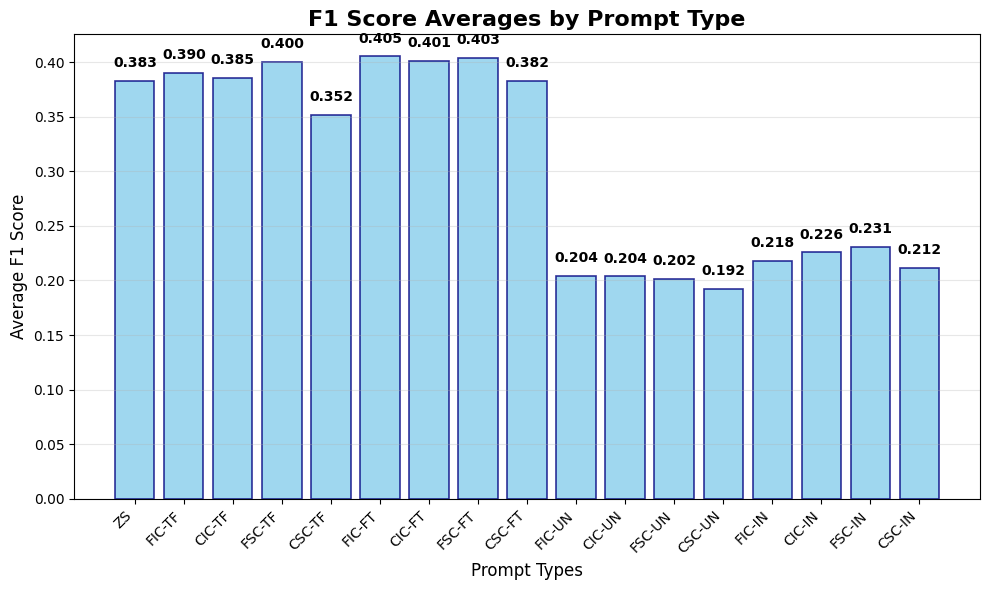

In [8]:
dataset = 'D8'
candidate_pairs = 'original'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.815124
FIC-TF,0.780207
CIC-TF,0.761206
FSC-TF,0.786954
CSC-TF,0.782845
FIC-FT,0.800735
CIC-FT,0.779373
FSC-FT,0.804418
CSC-FT,0.799281
FIC-UN,0.885123


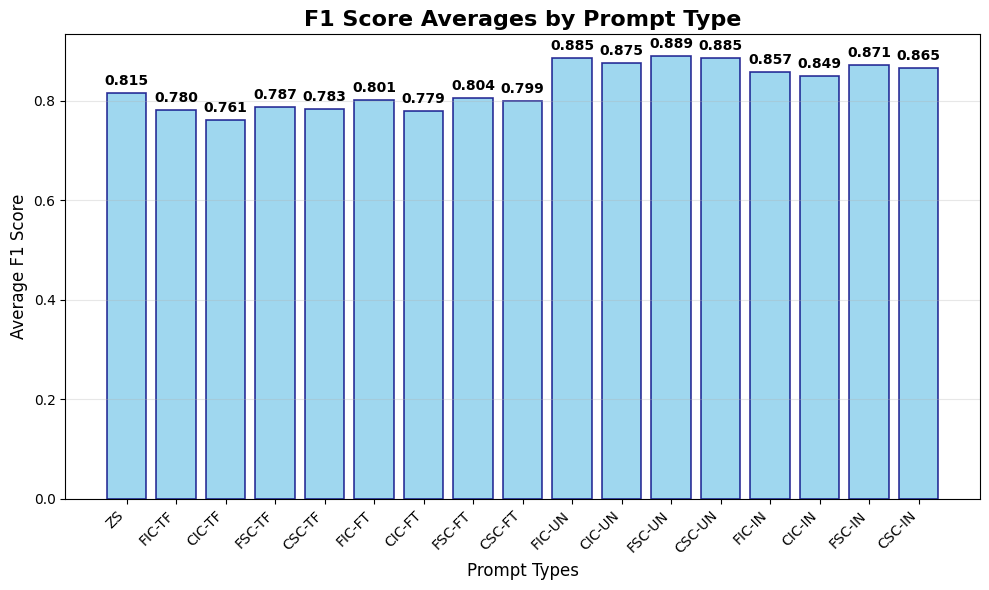

In [9]:
dataset = 'D2'
candidate_pairs = 'standard_blocking'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.745498
FIC-TF,0.705631
CIC-TF,0.783663
FSC-TF,0.774447
CSC-TF,0.772269
FIC-FT,0.636417
CIC-FT,0.779609
FSC-FT,0.760025
CSC-FT,0.781518
FIC-UN,0.756840


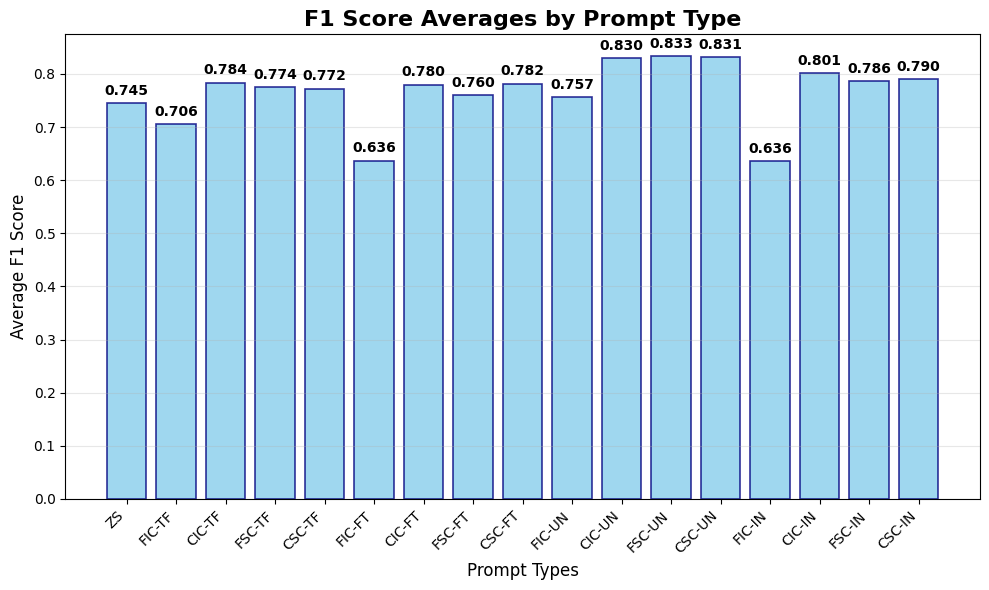

In [10]:
dataset = 'D5'
candidate_pairs = 'standard_blocking'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.590289
FIC-TF,0.602735
CIC-TF,0.589525
FSC-TF,0.557924
CSC-TF,0.575410
FIC-FT,0.605214
CIC-FT,0.613108
FSC-FT,0.584674
CSC-FT,0.585218
FIC-UN,0.683673


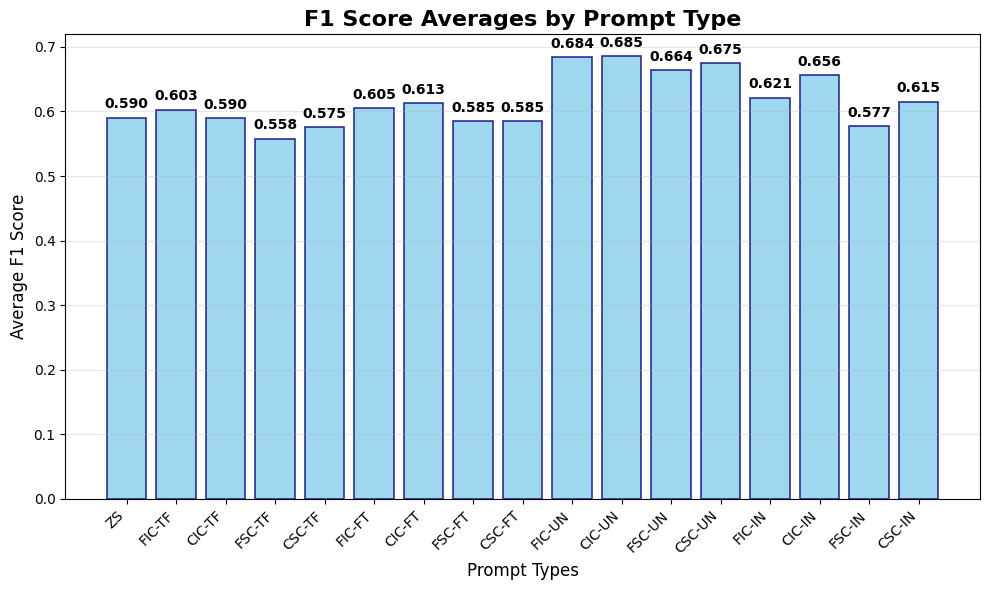

In [11]:
dataset = 'D6'
candidate_pairs = 'standard_blocking'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.493325
FIC-TF,0.505136
CIC-TF,0.503461
FSC-TF,0.498617
CSC-TF,0.471810
FIC-FT,0.522520
CIC-FT,0.520190
FSC-FT,0.509307
CSC-FT,0.477787
FIC-UN,0.616115


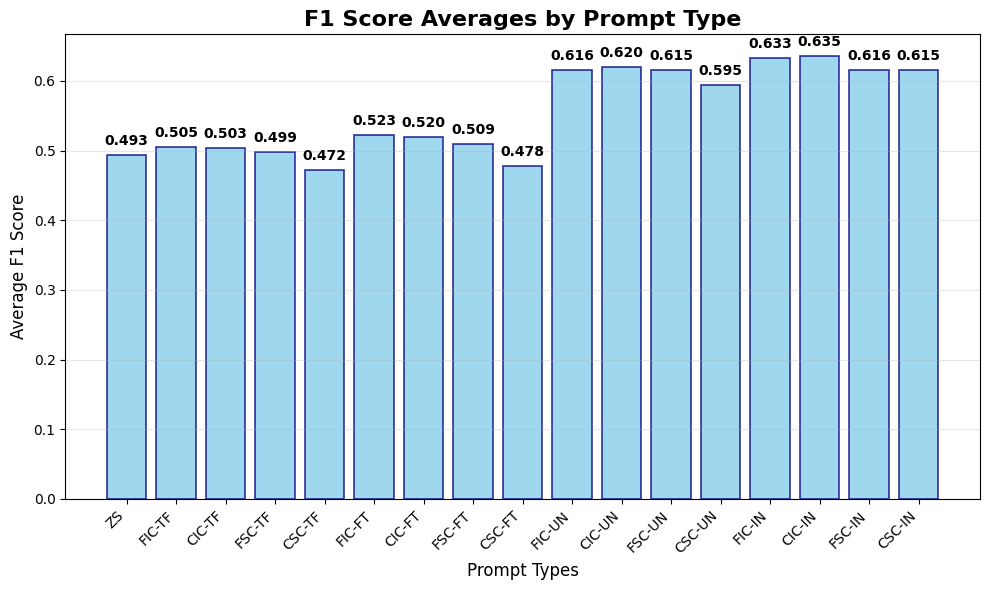

In [12]:
dataset = 'D7'
candidate_pairs = 'standard_blocking'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)

Prompt Types,Average F1
ZS,0.476170
FIC-TF,0.460316
CIC-TF,0.449378
FSC-TF,0.477763
CSC-TF,0.434536
FIC-FT,0.463944
CIC-FT,0.462305
FSC-FT,0.477719
CSC-FT,0.459300
FIC-UN,0.545666


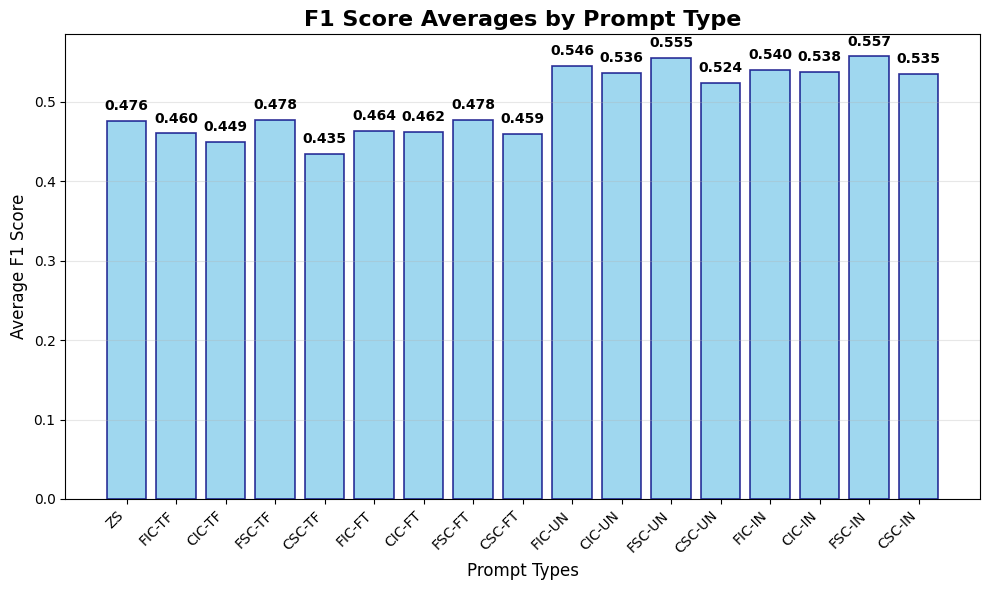

In [13]:
dataset = 'D8'
candidate_pairs = 'standard_blocking'

results = f'results/{candidate_pairs}/{dataset}.csv'
results = pd.read_csv(results)
    
results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
results_ui = pd.read_csv(results_ui)
results_ui['model_type'] = results_ui['model'].apply(extract_model_type)
results['model_type'] = results['model'].apply(extract_model_type)
results = results[(results['model_type'] != 'P1')  & (results['model_type'] != "UN") & (results["model_type"] != "IN")] 
results_ui = results_ui[results_ui['model_type'] != 'P1']
results = pd.concat([results,results_ui])

groupby = results.groupby(by=['model_type', 'examples'])

groups = { 
        "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
}

for model in model_types: 
    for key in examples: 
        groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()

# groups
df_plot_show(groups)